In [731]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [732]:
data = pd.read_csv(r'C:\Users\Badi\Downloads\bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [733]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [734]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [735]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [736]:
y = data['deposit']
y

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [737]:
y = y.to_numpy()
y

array(['yes', 'yes', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [738]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y 

array([1, 1, 1, ..., 0, 0, 0])

In [739]:
data.drop(["deposit"],axis = 1,inplace = True)

In [740]:
data1 = data.select_dtypes(include = 'object')
data1

,job,marital,education,default,housing,loan,contact,month,poutcome
0,admin.,married,secondary,no,yes,no,unknown,may,unknown
1,admin.,married,secondary,no,no,no,unknown,may,unknown
2,technician,married,secondary,no,yes,no,unknown,may,unknown
3,services,married,secondary,no,yes,no,unknown,may,unknown
4,admin.,married,tertiary,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown
11158,services,married,secondary,no,no,no,unknown,jun,unknown
11159,technician,single,secondary,no,no,no,cellular,aug,unknown
11160,technician,married,secondary,no,no,yes,cellular,may,failure


In [741]:
data2 = data.select_dtypes(include = 'int64')
data2

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [742]:
for c in data2.columns:
    data[c] = data[c]/max(data[c])

In [743]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,0.434021,0.018823,0.505098,0.095850,0.039816,0.060106,0.014354
std,0.125404,0.039720,0.271637,0.089443,0.043208,0.127352,0.039517
min,0.189474,-0.084319,0.032258,0.000515,0.015873,-0.001171,0.000000
25%,0.336842,0.001502,0.258065,0.035558,0.015873,-0.001171,0.000000
50%,0.410526,0.006773,0.483871,0.065705,0.031746,-0.001171,0.000000
75%,0.515789,0.021033,0.709677,0.127802,0.047619,0.024297,0.017241
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [744]:
for c in data1.columns:
    encoder = LabelEncoder()
    encoder.fit(data1[c].to_numpy())
    y = encoder.transform(data1[c].to_numpy())
    data[c] = y

In [745]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  int32  
 2   marital    11162 non-null  int32  
 3   education  11162 non-null  int32  
 4   default    11162 non-null  int32  
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  int32  
 7   loan       11162 non-null  int32  
 8   contact    11162 non-null  int32  
 9   day        11162 non-null  float64
 10  month      11162 non-null  int32  
 11  duration   11162 non-null  float64
 12  campaign   11162 non-null  float64
 13  pdays      11162 non-null  float64
 14  previous   11162 non-null  float64
 15  poutcome   11162 non-null  int32  
dtypes: float64(7), int32(9)
memory usage: 1003.0 KB


In [746]:
for c in data1.columns :
    y = data[c]
    y = y.to_numpy()
    y = y/max(y)
    data[c] = y

In [747]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,0.434021,0.407991,0.599669,0.428388,0.015051,0.018823,0.473123,0.130801,0.244849,0.505098,0.495064,0.095850,0.039816,0.060106,0.014354,0.825927
std,0.125404,0.293194,0.312776,0.249826,0.121761,0.039720,0.499299,0.337198,0.409362,0.271637,0.290176,0.089443,0.043208,0.127352,0.039517,0.334317
min,0.189474,0.000000,0.000000,0.000000,0.000000,-0.084319,0.000000,0.000000,0.000000,0.032258,0.000000,0.000515,0.015873,-0.001171,0.000000,0.000000
25%,0.336842,0.090909,0.500000,0.333333,0.000000,0.001502,0.000000,0.000000,0.000000,0.258065,0.272727,0.035558,0.015873,-0.001171,0.000000,0.666667
50%,0.410526,0.363636,0.500000,0.333333,0.000000,0.006773,0.000000,0.000000,0.000000,0.483871,0.545455,0.065705,0.031746,-0.001171,0.000000,1.000000
75%,0.515789,0.636364,1.000000,0.666667,0.000000,0.021033,1.000000,0.000000,0.500000,0.709677,0.727273,0.127802,0.047619,0.024297,0.017241,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [748]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  float64
 1   job        11162 non-null  float64
 2   marital    11162 non-null  float64
 3   education  11162 non-null  float64
 4   default    11162 non-null  float64
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  float64
 7   loan       11162 non-null  float64
 8   contact    11162 non-null  float64
 9   day        11162 non-null  float64
 10  month      11162 non-null  float64
 11  duration   11162 non-null  float64
 12  campaign   11162 non-null  float64
 13  pdays      11162 non-null  float64
 14  previous   11162 non-null  float64
 15  poutcome   11162 non-null  float64
dtypes: float64(16)
memory usage: 1.4 MB


In [749]:
x = data.to_numpy()
x

array([[ 0.62105263,  0.        ,  0.5       , ..., -0.00117096,
         0.        ,  1.        ],
       [ 0.58947368,  0.        ,  0.5       , ..., -0.00117096,
         0.        ,  1.        ],
       [ 0.43157895,  0.81818182,  0.5       , ..., -0.00117096,
         0.        ,  1.        ],
       ...,
       [ 0.33684211,  0.81818182,  1.        , ..., -0.00117096,
         0.        ,  1.        ],
       [ 0.45263158,  0.81818182,  0.5       , ...,  0.20140515,
         0.0862069 ,  0.        ],
       [ 0.35789474,  0.81818182,  0.5       , ..., -0.00117096,
         0.        ,  1.        ]])

In [750]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 3)
x_model,x_valid,y_model,y_valid = train_test_split(x_train,y_train,test_size = 0.2)

In [751]:
x_model.shape

(8036, 16)

In [752]:
x_valid.shape

(2009, 16)

In [753]:
x_test.shape

(1117, 16)

In [754]:
model = Sequential([
    Dense(120,activation = 'relu', input_dim=16 ),
    Dense(1,activation = "softplus")
])

In [755]:
from keras.callbacks import EarlyStopping
mycallbacks = [EarlyStopping(monitor='loss', patience=2)]

In [756]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(x_model,y_model,
                   validation_data = (x_valid,y_valid),epochs = 150,batch_size = 32,callbacks=mycallbacks
                   )

Epoch 1/150
252/252 [==============================] - 0s 984us/step - loss: 0.1769 - accuracy: 0.8223 - val_loss: 0.1082 - val_accuracy: 0.8631
Epoch 2/150
252/252 [==============================] - 0s 604us/step - loss: 0.1115 - accuracy: 0.8515 - val_loss: 0.1005 - val_accuracy: 0.8631
Epoch 3/150
252/252 [==============================] - 0s 587us/step - loss: 0.1063 - accuracy: 0.8515 - val_loss: 0.0972 - val_accuracy: 0.8631
Epoch 4/150
252/252 [==============================] - 0s 608us/step - loss: 0.1038 - accuracy: 0.8515 - val_loss: 0.0951 - val_accuracy: 0.8631
Epoch 5/150
252/252 [==============================] - 0s 588us/step - loss: 0.1022 - accuracy: 0.8515 - val_loss: 0.0938 - val_accuracy: 0.8631
Epoch 6/150
252/252 [==============================] - 0s 583us/step - loss: 0.1010 - accuracy: 0.8515 - val_loss: 0.0927 - val_accuracy: 0.8631
Epoch 7/150
252/252 [==============================] - 0s 616us/step - loss: 0.0999 - accuracy: 0.8515 - val_loss: 0.0918 - val_ac

In [757]:
plt.style.use("fivethirtyeight")

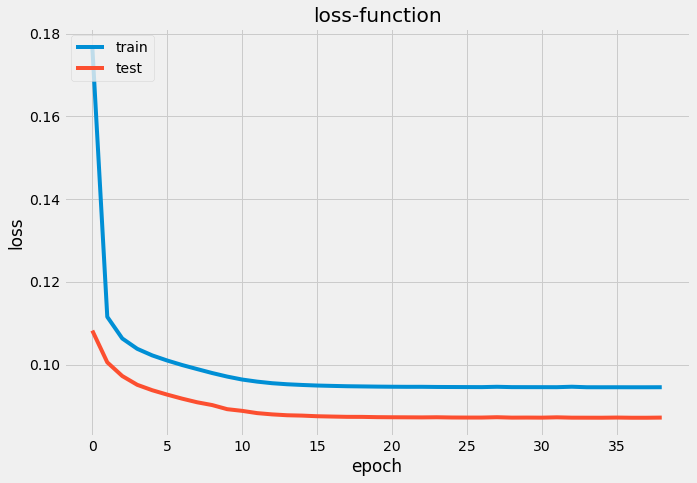

In [758]:
fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss-function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

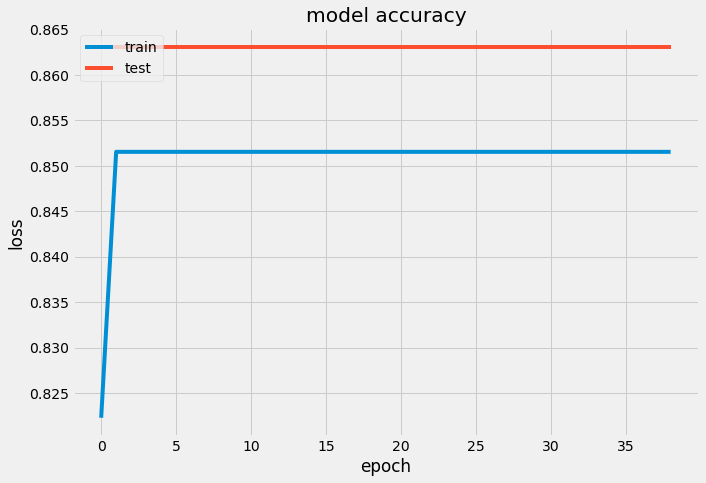

In [759]:
fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [760]:
model.evaluate(x_test,y_test)

35/35 [==============================] - 0s 436us/step - loss: 0.0798 - accuracy: 0.8747


[0.07981254160404205, 0.874664306640625]